<a href="https://colab.research.google.com/github/VictorFreir/Youtube-Views_Predict/blob/master/Youtube_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Hey, dude!</h1>
<h2>Sinta-se no seu próprio repositório!</h2>
<h4>Nesse Notebook, tentaremos prever a quantidade de views de um vídeo do Youtube usando Regressão Linear.</h4>
<br>
<hr>
<br>
<h1><strong>Introdução</strong></h1>
<p>Para começar, vamos entender mais sobre o projeto. A ideia é implementar um modelo de Regressão Linear para a predição da quantidade de views baseado em alguma outra variável que ainda vamos descobrir na fase de exploração de dados.</p>
<p>Vamos começar importanto as bibliotecas necessárias e base de dados, que por sinal está disponível no Kaggle como: Trending YouTube Video Statistics</p>


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/CAvideos.csv')

<h1><strong>Análise exploratória dos dados</strong></h1>
<p>Vamos começar dando uma olhada no que tem nesse conjunto de dados:</p>

In [66]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


<p>Bem, para aplicarmos uma Regressão Linear simples, nós utilizaremos apenas variáveis quantitativa. E, no nosso conjunto de dados, as variáveis que parecem nos servir são: visualizações, likes, deslikes e número de comentários. Então, selecionaremos apenas eles:</p>

In [38]:
df = df[['views','likes','dislikes','comment_count']]
df.head(3)

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181


<p>Agora que temos apenas os dados que são essenciais para o nosso modelo, nós podemos verificar quais variáveis estão correlacionadas, ou seja, quando uma varia, de alguma forma, a outra também varia de alguma forma, mas não necessariamente a mesma forma. Para isso, nós calculamos uma medida chama Pearson's R. Nós podemos calcular-la de duas formas, a primeira:</p>

In [67]:
mean_views = df['views'].mean()
std_views = df['views'].std()
views = df['views']

mean_likes = df['likes'].mean()
std_likes = df['likes'].std()
likes = df['likes']

pearson_r = 0
for i in range(len(likes)):
    pearson_r += ((views.iloc[i]-mean_views)/std_views) * ((likes.iloc[i]-mean_likes)/std_likes)
pearson_r = pearson_r / len(likes)


Dessa forma, nós calculamos a correlação entre os likes e as visualizações. No entanto, nós teríamos que fazer isso para todas as combinações de nossas variáveis. Isso parece bem cansativo. Para nossa sorte, o Pandas - sempre maravilhoso - calcula todos os coeficientes de correlação com APENAS uma linha de código. EU SEI É INCRÍVEL! 
<br>
Tá, se você não é da área talvez não tenha achado tão incrível, mas acredite, é uma ajuda inenarrável. 

In [68]:
correlation = df.corr()
correlation

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


<p>Bem, essa segunda forma é bem mais fácil de ser executada e nós, com ajuda do seaborn, ainda conseguimos mostrar os resultados de forma mais amigável:</p>

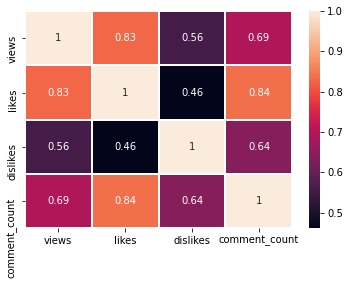

In [41]:
sns.heatmap(correlation, annot=True,linewidths=1)

<p>Para a interpretação desse gráfico, é necessário que a gente saiba que o coeficiente de correlação indica que, quanto mais próximo do 1, mais correlacionadas as variáveis estão. Nós precisamos prever as visualizações, logo vemos que a varíavel mais correlacionada com as visualizações são os likes. Dessa forma, utilizaremos os likes como forma de prever um valor aproximado das visualizações de um vídeo.</p>

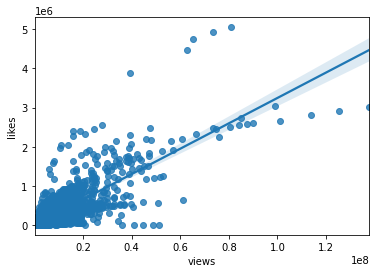

In [42]:
sns.regplot(x='views',y='likes',data=df)

<p>Plotei esse gráfico acima para darmos uma olhada mais aprofundada nessa correlação. Essa linha será a utilizada para prevermos o resultado. Se você não conhece os modelos de Regressão Linear, não precisa sair desse notebook, você conseguirá acompanhar o projeto e ver onde chegaremos.</p>

<h1><strong>Criando o modelo</strong></h1>
<p>Agora, começaremos a criar o nosso modelo em si. A fórmula que usaremos é y = a + b*x</p>
<p>Para aplicarmos ela, nós precisamos "descobrir" o valor de a e de b. Começaremos com o valor de b:</p>

In [69]:
def pearson_r(x,y):
    r = 0
    for i in range(len(x)):
        r +=((x[i]-x.mean())/x.std()) * ((y[i]-y.mean())/y.std())
    r = r / len(likes)
    return r
    
def b_calculator(x,y):
    mediax = x.mean()
    mediay = y.mean()
    sx = x.std()
    sy = y.std()
    r = pearson_r(x,y)
    b = r*(sy/sx)
    return b

<p>Agora, calcularemos o valor de a:</p>

In [70]:
def a_calculator(x,y,b):
    a = y.mean() - (b*x.mean())
    return a

<p>Por fim, precisamos criar um função que faça a predição dos valores de visualizações:</p>

In [71]:
def predict_value(x,y,value):
    b = b_calculator(x,y)
    a = a_calculator(x,y,b)
    pred = a + b*value
    return pred

<p>Agora, nós já temos nossa função de predição de visualizações. Nós podemos apenas enviarmos o número para ela e a função se encarregará de treinar e prever o valor das visualizações.</p>

In [72]:
predict_value(df['likes'],df['views'], 200)

312758.408444482

<p>Dessa forma, segundo nosso modelo de Regressão Linear simples, um vídeo com 200 likes - no Youtube canadense - deve ter aproximadamente 31 mil views. Não sei se você também notou, mas me pareceu que canadense não dá muito "joinha" no vídeo.</p>

<h1><strong>Avaliando o modelo</strong></h1>


<p>Agora, vamos usar o método square's pearson, que nos dará a acertividade do nosso modelo. Em palavras cotidianas, esse calculo nos mostrará o quão melhor é usar essa Regressão Linear no lugar da simples média:</p>

In [64]:
pearson_r(df['likes'],df['views'])**2

0.6871481246469536

Isso nos mostra que nosso modelo de Regressão Linear é 68% melhor do que usar a média para predição de valores.

<h1><strong>Concluindo</strong></h1>

<p>Bem, por fim, nós conseguimos criar nosso modelo de Regressão Lienar simples, de forma que ele tenta prever as visualizações com base nos likes do vídeo. Tudo isso usando dados do Youtube canadense disponibilizados no Kaggle. Nós vimos que ele tem uma acurácia relativamemnte boa em comparação ao uso da média. No entanto, não podemos afirmar com certeza que todos os vídeos com 200 likes no Youtube canadense terá por volta de 31 mil views, pois, para isso, ele teria que ter 100% de acurácia.</p>
<p>Por fim, quero te agradecer por seguir comigo nesse projeto que foi muito enriquecedor para mim. Se você gostou, convido-lhe a conhecer mais meu LinkedIn ou Github.</p>

<ul>
<li>LinkedIn: https://www.linkedin.com/in/victor-vin%C3%ADcius-freire-de-ara%C3%BAjo-bb3782207/</li>
<li>GitHub: https://github.com/VictorFreir</li>
</ul>